NOTE: For the most up to date version of this notebook, please be sure to copy from this link:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ByRi9d6_Yzu0nrEKArmLMLuMaZjYfygO#scrollTo=WgHANbxqWJPa)



**Name:** Tacsay, Marie Emmanuelle
<br> **Section:** CPE32S8
<br> **Instructor:** Engr. Roman Richard

## **Training YOLOv3 object detection on a custom dataset**

💡 Recommendation: [Open this blog post](https://blog.roboflow.ai/training-a-yolov3-object-detection-model-with-a-custom-dataset/) to continue.

### **Overview**

This notebook walks through how to train a YOLOv3 object detection model on your own dataset using Roboflow and Colab.

In this specific example, we'll training an object detection model to recognize chess pieces in images. **To adapt this example to your own dataset, you only need to change one line of code in this notebook.**

![Chess Example](https://i.imgur.com/nkjobw1.png)

### **Our Data**

Our dataset of 289 chess images (and 2894 annotations!) is hosted publicly on Roboflow [here](https://public.roboflow.ai/object-detection/chess-full).

### **Our Model**

We'll be training a YOLOv3 (You Only Look Once) model. This specific model is a one-shot learner, meaning each image only passes through the network once to make a prediction, which allows the architecture to be very performant, viewing up to 60 frames per second in predicting against video feeds.

The GitHub repo containing the majority of the code we'll use is available [here](https://github.com/roboflow-ai/keras-yolo3.git).

### **Training**

Google Colab provides free GPU resources. Click "Runtime" → "Change runtime type" → Hardware Accelerator dropdown to "GPU."

Colab does have memory limitations, and notebooks must be open in your browser to run. Sessions automatically clear themselves after 24 hours.

### **Inference**

We'll leverage the `python_video.py` script to produce predictions. Arguments are specified below.

It's recommended that you expand the left-hand panel to view this notebook's Table of contents, Code Snippets, and Files.

![Expand Colab](https://i.imgur.com/r8kWzIv.png "Click here")

Then, click "Files." You'll see files appear here as we work through the notebook.


### **About**

[Roboflow](https://roboflow.ai) makes managing, preprocessing, augmenting, and versioning datasets for computer vision seamless.

Developers reduce 50% of their boilerplate code when using Roboflow's workflow, save training time, and increase model reproducibility.

#### ![Roboflow Workmark](https://i.imgur.com/WHFqYSJ.png)







## Setup our environment

First, we'll install the version of Keras our YOLOv3 implementation calls for and verify it installs corrects.

In [1]:
# Get our kernel running
print("Hello, Roboflow")

Hello, Roboflow


In [20]:
# Our YOLOv3 implementation calls for this Keras version
!pip install keras==2.1.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.9/334.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.1/670.1 kB 40.6 MB/s eta 0:00:00


In [ ]:
# use TF 1.x
#%tensorflow_version 1.x.  #Google Colab removed support for TensorFlow 1 in their latest release of 2022/8/11.



!pip uninstall tensorflow
!pip install tensorflow-gpu==1.15
!apt install --allow-change-held-packages libcudnn7=7.4.1.5-1+cuda10.0

In [2]:
# Next, we'll grab all the code from our repository of interest
!git clone https://github.com/roboflow-ai/keras-yolo3

Cloning into 'YOLOv3-object-detection-tutorial'...


In [2]:
# here's what we cloned (also, see "Files" in the left-hand Colab pane)
%ls

 Volume in drive C is OS
 Volume Serial Number is 32FB-9377

 Directory of c:\Users\emtac\Downloads

31/03/2024  08:02 pm    <DIR>          .
31/03/2024  08:02 pm    <DIR>          ..
21/03/2024  10:45 pm    <DIR>          .ipynb_checkpoints
30/03/2024  07:46 pm           228,500 1494016371-roa060117fea-ferrari01lead.jpg
31/01/2024  07:45 pm           443,596 417420181_1348577145794301_1586327174408111805_n.jpg
31/01/2024  07:45 pm           222,797 417796056_751290206923542_3251998985403321453_n.jpg
31/01/2024  07:45 pm           206,483 418160010_779126500918558_5733216333997283331_n.jpg
31/01/2024  07:45 pm           214,817 421809700_762829085706207_5423084412826182946_n.jpg
22/03/2024  10:48 pm           250,640 432683773_1446471256255281_221636715739631819_n.jpg
21/03/2024  10:45 pm             5,925 accesing_trainsplitting_data.ipynb
25/02/2024  11:52 pm         1,207,928 Activity No 5 Logical Instructions.docx
11/03/2024  11:09 pm            68,438 Activity No 7 Procedure.docx


In [3]:
# change directory to the repo we cloned
%cd YOLOv3-object-detection-tutorial/YOLOv3-custom-training

c:\Users\emtac\Downloads\YOLOv3-object-detection-tutorial\YOLOv3-custom-training


In [4]:
# show the contents of our repo
%ls

 Volume in drive C is OS
 Volume Serial Number is 32FB-9377

 Directory of c:\Users\emtac\Downloads\YOLOv3-object-detection-tutorial\YOLOv3-custom-training

31/03/2024  04:41 pm    <DIR>          .
31/03/2024  04:41 pm    <DIR>          ..
31/03/2024  03:21 pm           109,408 4_CLASS_test.txt
31/03/2024  03:21 pm                39 4_CLASS_test_classes.txt
31/03/2024  03:21 pm    <DIR>          Aerial-Maritime-9
31/03/2024  03:21 pm            10,397 convert.py
31/03/2024  03:21 pm            53,510 hydrant.jpg
31/03/2024  03:21 pm           427,712 hydrant2.jpg
31/03/2024  03:21 pm             6,926 image_detect.py
31/03/2024  03:21 pm    <DIR>          model_data
31/03/2024  03:21 pm             8,368 realtime_detect.py
31/03/2024  03:21 pm             8,510 train.py
31/03/2024  03:21 pm            10,963 train_bottleneck.py
31/03/2024  03:21 pm             7,863 webcam_detect.py
31/03/2024  03:21 pm    <DIR>          yolo3
              10 File(s)        643,696 bytes
             

## Get our training data from Roboflow

Next, we need to add our data from Roboflow into our environment.

Our dataset, with annotations, is [here](https://public.roboflow.ai/object-detection/chess-full).

Here's how to bring those images from Roboflow to Colab:

1. Visit this [link](https://public.roboflow.ai/object-detection/chess-full).
2. Click the "416x416auto-orient" under Downloads.
3. On the dataset detail page, select "Download" in the upper right-hand corner.
4. If you are not signed in, you will be prompted to create a free account (sign in with GitHub or email), and redirected to the dataset page to Download.
5. On the download popup, select the YOLOv3 Keras option **and** the "Show download `code`".
6. Copy the code snippet Roboflow generates for you, and paste it in the next cell.

This is the download menu you want (from step 5):
#### ![Download Menu](https://i.imgur.com/KW2PyQO.png)

The top code snippet is the one you want to copy (from step 6) and paste in the next notebook cell:
### ![Code Snippet](https://i.imgur.com/qzJckWR.png)





**This cell below is only one you need to change to have YOLOv3 train on your own Roboflow dataset.**

In [6]:
!pip install roboflow

In [6]:
# Paste Roboflow code from snippet here from above to here!
from roboflow import Roboflow
rf = Roboflow(api_key="1V0Jhart5itO7feAZpBp")
project = rf.workspace("joseph-nelson").project("chess-pieces-new")
version = project.version(24)
dataset = version.download("yolokeras")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chess-Pieces-24 in yolokeras:: 100%|██████████| 704/704 [00:00<00:00, 1071.16it/s]


**Analysis:** In this part of the activity, the dataset included images that shows the images of different chess pieces. This part of the activity aims to detect the various chess pieces depending on the image used for object detection. The data came from roboflow which the images were undergone augmentation for a better pre-processing of the data.

In [7]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 32FB-9377

 Directory of c:\Users\emtac\Downloads\YOLOv3-object-detection-tutorial\YOLOv3-custom-training

31/03/2024  08:17 pm    <DIR>          .
31/03/2024  08:17 pm    <DIR>          ..
31/03/2024  03:21 pm           109,408 4_CLASS_test.txt
31/03/2024  03:21 pm                39 4_CLASS_test_classes.txt
31/03/2024  03:21 pm    <DIR>          Aerial-Maritime-9
31/03/2024  08:17 pm    <DIR>          Chess-Pieces-24
31/03/2024  03:21 pm            10,397 convert.py
31/03/2024  03:21 pm            53,510 hydrant.jpg
31/03/2024  03:21 pm           427,712 hydrant2.jpg
31/03/2024  03:21 pm             6,926 image_detect.py
31/03/2024  03:21 pm    <DIR>          model_data
31/03/2024  03:21 pm             8,368 realtime_detect.py
31/03/2024  03:21 pm             8,510 train.py
31/03/2024  03:21 pm            10,963 train_bottleneck.py
31/03/2024  03:21 pm             7,863 webcam_detect.py
31/03/2024  03:21 pm    <DIR>          yolo3
    

In [9]:
# change directory into our export folder from Roboflow
%cd Chess-Pieces-24

c:\Users\emtac\Downloads\YOLOv3-object-detection-tutorial\YOLOv3-custom-training\Chess-Pieces-24


In [10]:
# show what came with the Roboflow export
%ls

 Volume in drive C is OS
 Volume Serial Number is 32FB-9377

 Directory of c:\Users\emtac\Downloads\YOLOv3-object-detection-tutorial\YOLOv3-custom-training\Chess-Pieces-24

31/03/2024  08:17 pm    <DIR>          .
31/03/2024  08:17 pm    <DIR>          ..
31/03/2024  08:17 pm             1,860 README.dataset.txt
31/03/2024  08:17 pm               747 README.roboflow.txt
31/03/2024  08:17 pm    <DIR>          test
31/03/2024  08:17 pm    <DIR>          train
31/03/2024  08:17 pm    <DIR>          valid
               2 File(s)          2,607 bytes
               5 Dir(s)  91,020,918,784 bytes free


In [12]:
# change directory back to our
%cd ..

c:\Users\emtac\Downloads\YOLOv3-object-detection-tutorial


In [13]:
# show that all our images, _annotations.txt, and _classes.txt made it to our root directory
%ls

 Volume in drive C is OS
 Volume Serial Number is 32FB-9377

 Directory of c:\Users\emtac\Downloads\YOLOv3-object-detection-tutorial

31/03/2024  08:14 pm    <DIR>          .
31/03/2024  08:14 pm    <DIR>          ..
31/03/2024  03:30 pm    <DIR>          .mypy_cache
31/03/2024  06:08 pm             6,909 image_detect.py
31/03/2024  03:27 pm    <DIR>          model_data
31/03/2024  03:21 pm               684 README.md
31/03/2024  05:38 pm               417 README.roboflow.txt
31/03/2024  05:07 pm             8,355 realtime_detect.py
31/03/2024  05:38 pm    <DIR>          test
31/03/2024  05:38 pm            34,068 test.jpg
31/03/2024  05:38 pm    <DIR>          train
31/03/2024  05:39 pm             8,471 train_cheetah.py
31/03/2024  05:39 pm             8,471 train_chess.py
31/03/2024  05:38 pm    <DIR>          valid
31/03/2024  03:28 pm    <DIR>          yolo3
31/03/2024  03:25 pm       248,007,048 yolov3.weights
31/03/2024  08:17 pm    <DIR>          YOLOv3-custom-training
        

## Set up and train our model

Next, we'll download pre-trained weighs weights from DarkNet, set up our YOLOv3 architecture with those pre-trained weights, and initiate training.


In [14]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [15]:
!pip install wget

In [16]:
# download our DarkNet weights
!python -m wget https://pjreddie.com/media/files/yolov3.weights


Saved under yolov3.weights


In [14]:
import os
os.getcwd()

'c:\\Users\\emtac\\Downloads\\YOLOv3-object-detection-tutorial'

In [18]:
# call a Python script to set up our architecture with downloaded pre-trained weights
!python convert.py model_data/yolov3.cfg yolov3.weights model_data/yolo.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

Using TensorFlow backend.
2024-03-31 15:26:52.009699: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2024-03-31 15:26:52.009873: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.






2024-03-31 15:26:54.040967: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2024-03-31 15:26:54.043618: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library nvcuda.dll
2024-03-31 15:26:54.569154: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3050 Ti Laptop GPU major: 8 minor: 6 memoryClockRate(GHz): 1.485
pciBusID: 0000:01:00.0
2024-03-31 15:26:54.570704: W tensorflow/stream_executor/platform/default/dso_loader.cc:55]

**Analysis:** In this part of the activity, the needed python files were being called and the h5 that will be needed in the traning part were made as well as the weights file. Also the output that shown in the output cell shows the structure of the model will be used for this activity.

Below, we'll call a "self-contained" Python script that initiates training our model on our custom dataset.

Pay notable attention to:
- setting the paths for our `annotation_path`, `classes_path`, `class_names`. If you move the Roboflow data location, you'll need to update these.
- `val_split` dictates the size of our training data relative to our taining data
- `lr=1e-3` to set the learning rate of the model. Smaller optimizes more slowly but potentially more precisely.
- `batch_size` for the number of images trained per batch
-  `epoch` inside `model.fit_generator()` sets the number training epochs to increase/decrease training examples (and time)

Consider reading the YOLOv3 paper [here](https://pjreddie.com/media/files/papers/YOLOv3.pdf).

In [19]:
!pip install yolo3

In [ ]:
"""
Self-contained Python script to train YOLOv3 on your own dataset
"""

import tensorflow
import numpy as np
import keras.backend
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = '_annotations.txt'  # path to Roboflow data annotations
    log_dir = 'logs/000/'                 # where we're storing our logs
    classes_path = '_classes.txt'         # path to Roboflow class names
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    print("-------------------CLASS NAMES-------------------")
    print(class_names)
    print("-------------------CLASS NAMES-------------------")
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/yolo.h5') # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.2 # set the size of the validation set
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 32
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=500,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 32 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=100,
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    keras.backend.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    keras.backend.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

if __name__ == '__main__':
    _main()

In [15]:
## can call this cell instead of the above
!python train_chess.py

Create YOLOv3 model with 9 anchors and 13 classes.
Load weights model_data/yolo.h5.
Freeze the first 249 layers of total 252 layers.
Train on 546 samples, val on 60 samples, with batch size 32.
Epoch 1/25

17/17 [==============================] - 257s 15s/step - loss: 4682.3196 - val_loss: 1544.7343
Epoch 2/25

17/17 [==============================] - 225s 13s/step - loss: 905.6213 - val_loss: 436.1872
Epoch 3/25

17/17 [==============================] - 209s 12s/step - loss: 400.8115 - val_loss: 321.3517
Epoch 4/25

17/17 [==============================] - 196s 12s/step - loss: 289.0736 - val_loss: 255.2944
Epoch 5/25

17/17 [==============================] - 194s 11s/step - loss: 243.4178 - val_loss: 201.8116
Epoch 6/25

17/17 [==============================] - 206s 12s/step - loss: 213.0911 - val_loss: 174.9492
Epoch 7/25

17/17 [==============================] - 206s 12s/step - loss: 188.9972 - val_loss: 187.6458
Epoch 8/25

17/17 [==============================] - 205s 12s/step - 

Using TensorFlow backend.
2024-03-31 20:23:03.364405: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2024-03-31 20:23:03.364931: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.








2024-03-31 20:23:08.062453: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2024-03-31 20:23:08.078294: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library nvcuda.dll
2024-03-31 20:23:09.635593: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3050 Ti Laptop GPU major: 8 minor: 6 memoryClockRate(GHz): 1.485
pciBusID: 0000:01:00.0
2024-03-31 20:23:09.643963: W tensorflow/stream_executor/platform/default/dso_loader.cc:5

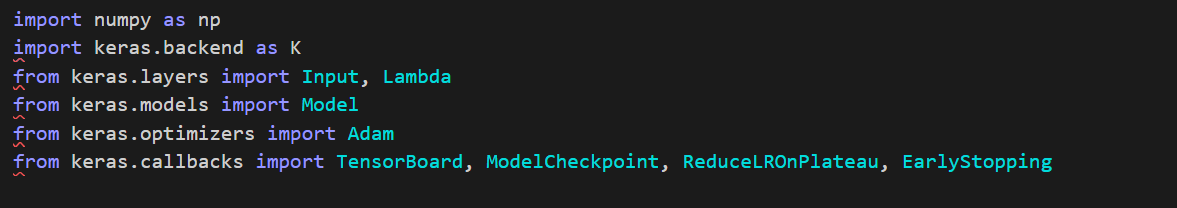

**Analysis:** This part of the activity would be the training part of the data. Using the train.py file, I was able to train the data and create the final weight file which is needed in order for the Image_detect.py file would run properly. Also the photo above shows the imported libraries in the training python file or the script above. It shows that Adam was used as the optimizer and there are callbacks in order to regulate the training process of the data.

## Use our model for inference

For predictions, we'll call a a Python script called `yolo_video.py` with required arguments for our use case: a path to our specific first stage trained weights (see our blog for why we're using only stage one), a path to our custom class names, and a flag to specify we're using images.

Additional arguments for `yolo_video.py` are as follows:

```
usage: yolo_video.py [-h] [--model MODEL] [--anchors ANCHORS]
                     [--classes CLASSES] [--gpu_num GPU_NUM] [--image]
                     [--input] [--output]

positional arguments:
  --input        Video input path
  --output       Video output path

optional arguments:
  -h, --help         show this help message and exit
  --model MODEL      path to model weight file, default model_data/yolo.h5
  --anchors ANCHORS  path to anchor definitions, default
                     model_data/yolo_anchors.txt
  --classes CLASSES  path to class definitions, default
                     model_data/coco_classes.txt
  --gpu_num GPU_NUM  Number of GPU to use, default 1
  --image            Image detection mode, will ignore all positional arguments
```

In [ ]:
!python yolo_video.py --model="logs/000/trained_weights_stage_1.h5" --classes="_classes_chess.txt" --image

### **Detecting Chess Pieces**

In [29]:
#Detecting Objects using Images
!python image_detect.py 

logs/000/trained_weights_final.h5 model, anchors, and classes loaded.


Using TensorFlow backend.
2024-04-01 05:33:08.665053: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2024-04-01 05:33:08.665211: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



2024-04-01 05:33:09.954263: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2024-04-01 05:33:09.957525: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library nvcuda.dll
2024-04-01 05:33:10.476953: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-01 05:33:10.479358: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-JNG07G70
2024-04-01 

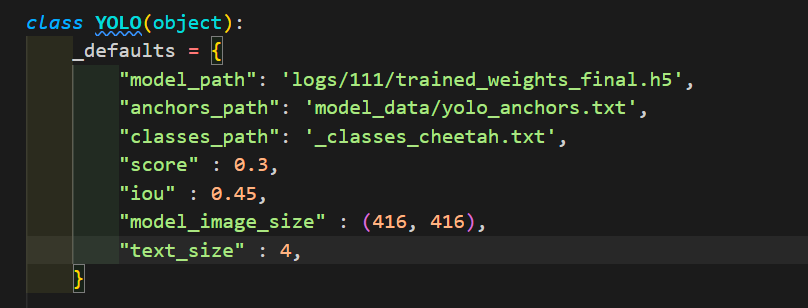

**Analysis:** This part of the activity is where the images are used for object detection. There would be an image that will be placed then the file or python file will detect the pieces using the weights of the model came from training the model used. Also, the photo above shows iou and threshold score for the bounding box or the measurement in detecting the object. In this case, the code used an iou score of 0.45 and a threshold score of 0.3, together with the other factors needed for the detection of chess pieces in which the results were displayed below.

### **Detecting Chess Pieces (Results)**

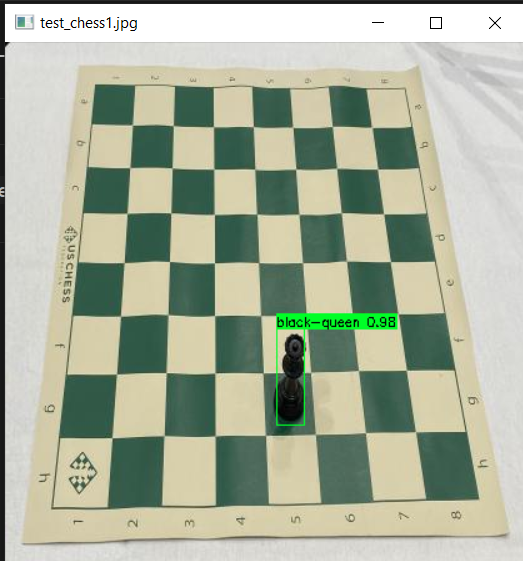

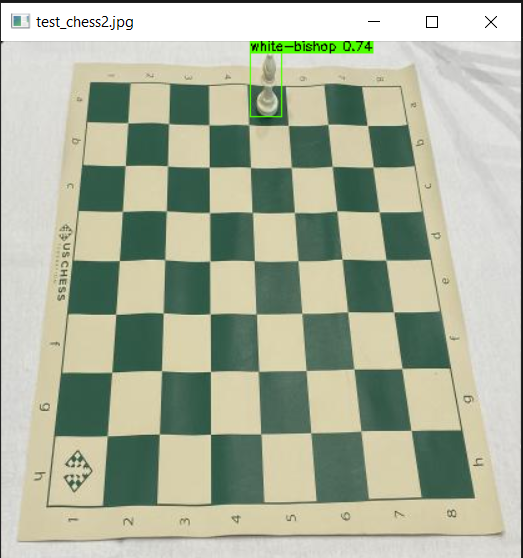

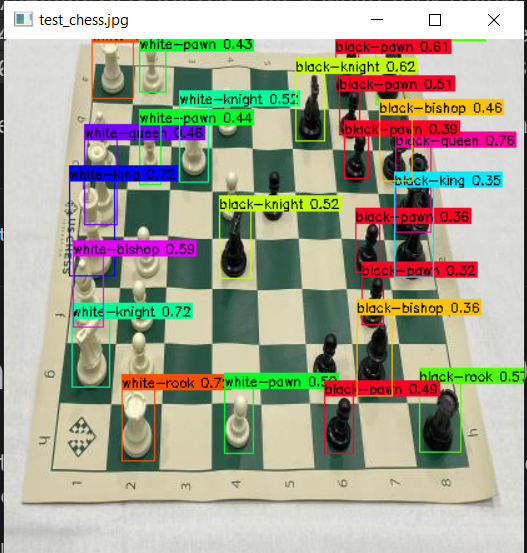

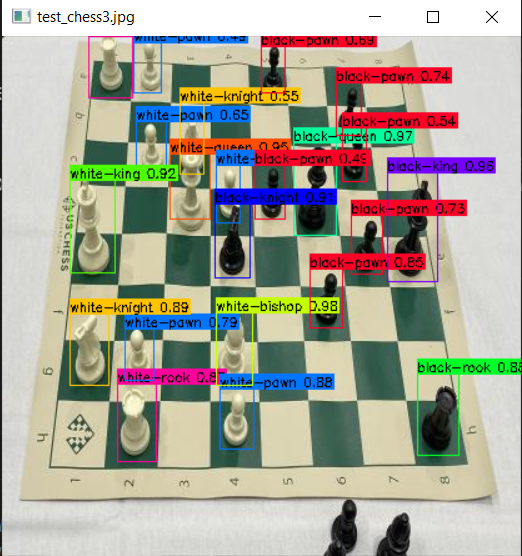

**Analysis/Evaluation:** The images above shows the various images in the test section of the dataset. Since the results shows some evidences that the image_detect python file work properly (bounding boxes were present), the weights came from the training file work properly especially the confidence level score of the bounding boxes reaches approximately from 70% above depending on the placement of the objects shown in the image since there around 50% confidence level.

For input image names into the above, consider trying the following:

- `00a7a49c47d51fd16a4cbb17e2d2cf86.jpg` # white-king works! + knight
- `015d0d7ff365f0b7492ff079c8c7d56c.jpg` # black-queen mixes up
- `176b28b5c417f39a9e5d37545fca5b4c.jpg` # finds only five
- `4673f994f60a2ea7afdddc1b752947c0.jpg` # white-rook (thinks king)
- `5ca7f0cb1c500554e65ad031190f8e9f.jpg` # white-pawn (missed white-king)
- `fbf15139f38a46e02b5f4061c0c9b08f.jpg` # black-king success!

You can view these images in your Colab notebook by clicking on the image name in the expanded left-hand panel (Files → keras-yolo3 → IMG_NAME ).

## Move currently trained model to GDrive

Optionally, you may want to save the new weights that your model trained so that the next time you run this notebook, you can either skip training and use these weights for inference or begin training where you left off with this weights file.

Following the below will link your Colab notebook to your Google Drive, and save the weights (named as the current time you saved them to enforce a unique file name) in your Drive folder.

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# create a copy of the weights file with a datetime
# and move that file to your own Drive
%cp ./logs/000/trained_weights_stage_1.h5 ./logs/000/trained_weights_stage_1_$(date +%F-%H:%M).h5
%mv ./logs/000/trained_weights_stage_1_$(date +%F-%H:%M).h5 /content/drive/My\ Drive/

### **Issues/Problems Encountered During the Procedure Part of the Activity:**

1. Since YOLOv3 is an old architecture of YOLO family, the required version of python should also be in lower version specifically python versions 3.6-3.8. Since Google Colab updated its python kernel (version 3.10) it is difficult to downgrade the said python kernel. Not downgrading the python version would create problems
2. Also, keras and tensorflow should also be in lower versions specifically 2.2.4 for keras and 1.15.0 in tensorflow. That's is why the tutorial for implementation of YOLOv3 required these versions of libraries. If not followed, the python files would not run properly and would show error just like the image below:

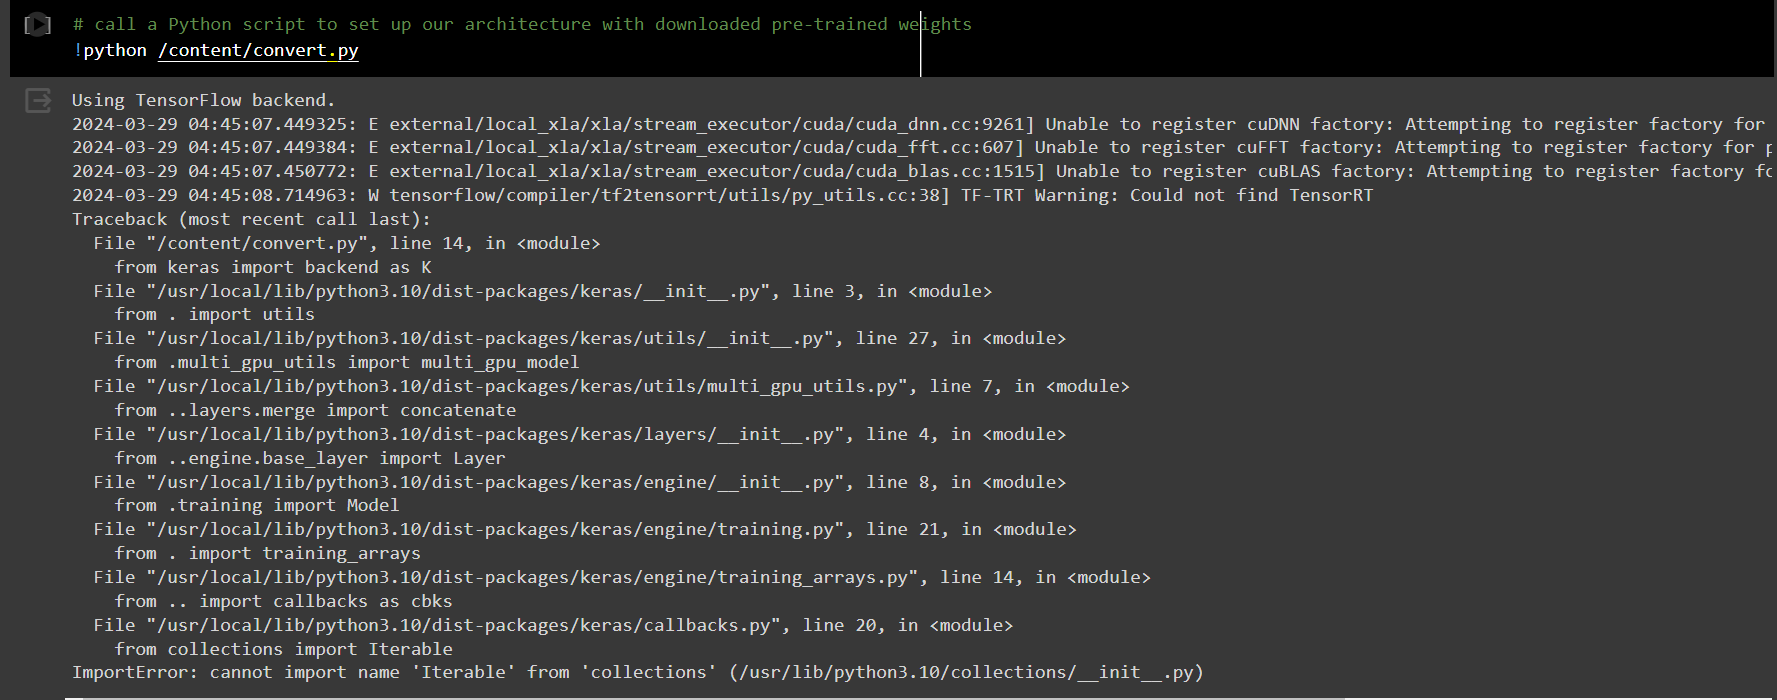

3. Google Colab also has limits in using GPU for processing the codes in the notebook. Thus, it is difficult to properly each code especially they are connected with one another. Running the code in Google Colab is a big problem. that is why I transferred running the notebook to VSCode.

4. There are line of codes that needed to be edited in order for the whole block of code to run properly. Also, there is a need to edit out a specific python file of the python version 3.7.0(python version I used for this activity) that needed to be edited so that the python file of this activity would run properly.

5. Since using GPU is needed for this activity, running the code especially when using the chess dataset made my storage full. It is because of the temporary files being created while the code is running as well as the logs made by these python files. Also, the weights could be one of the factor that occupies a large space of the storage which is a heavy file for the storage of the device. In addition, the running time to implement this activity especially in the training part is too long in which finishing this activity took a long time to be accomplished.
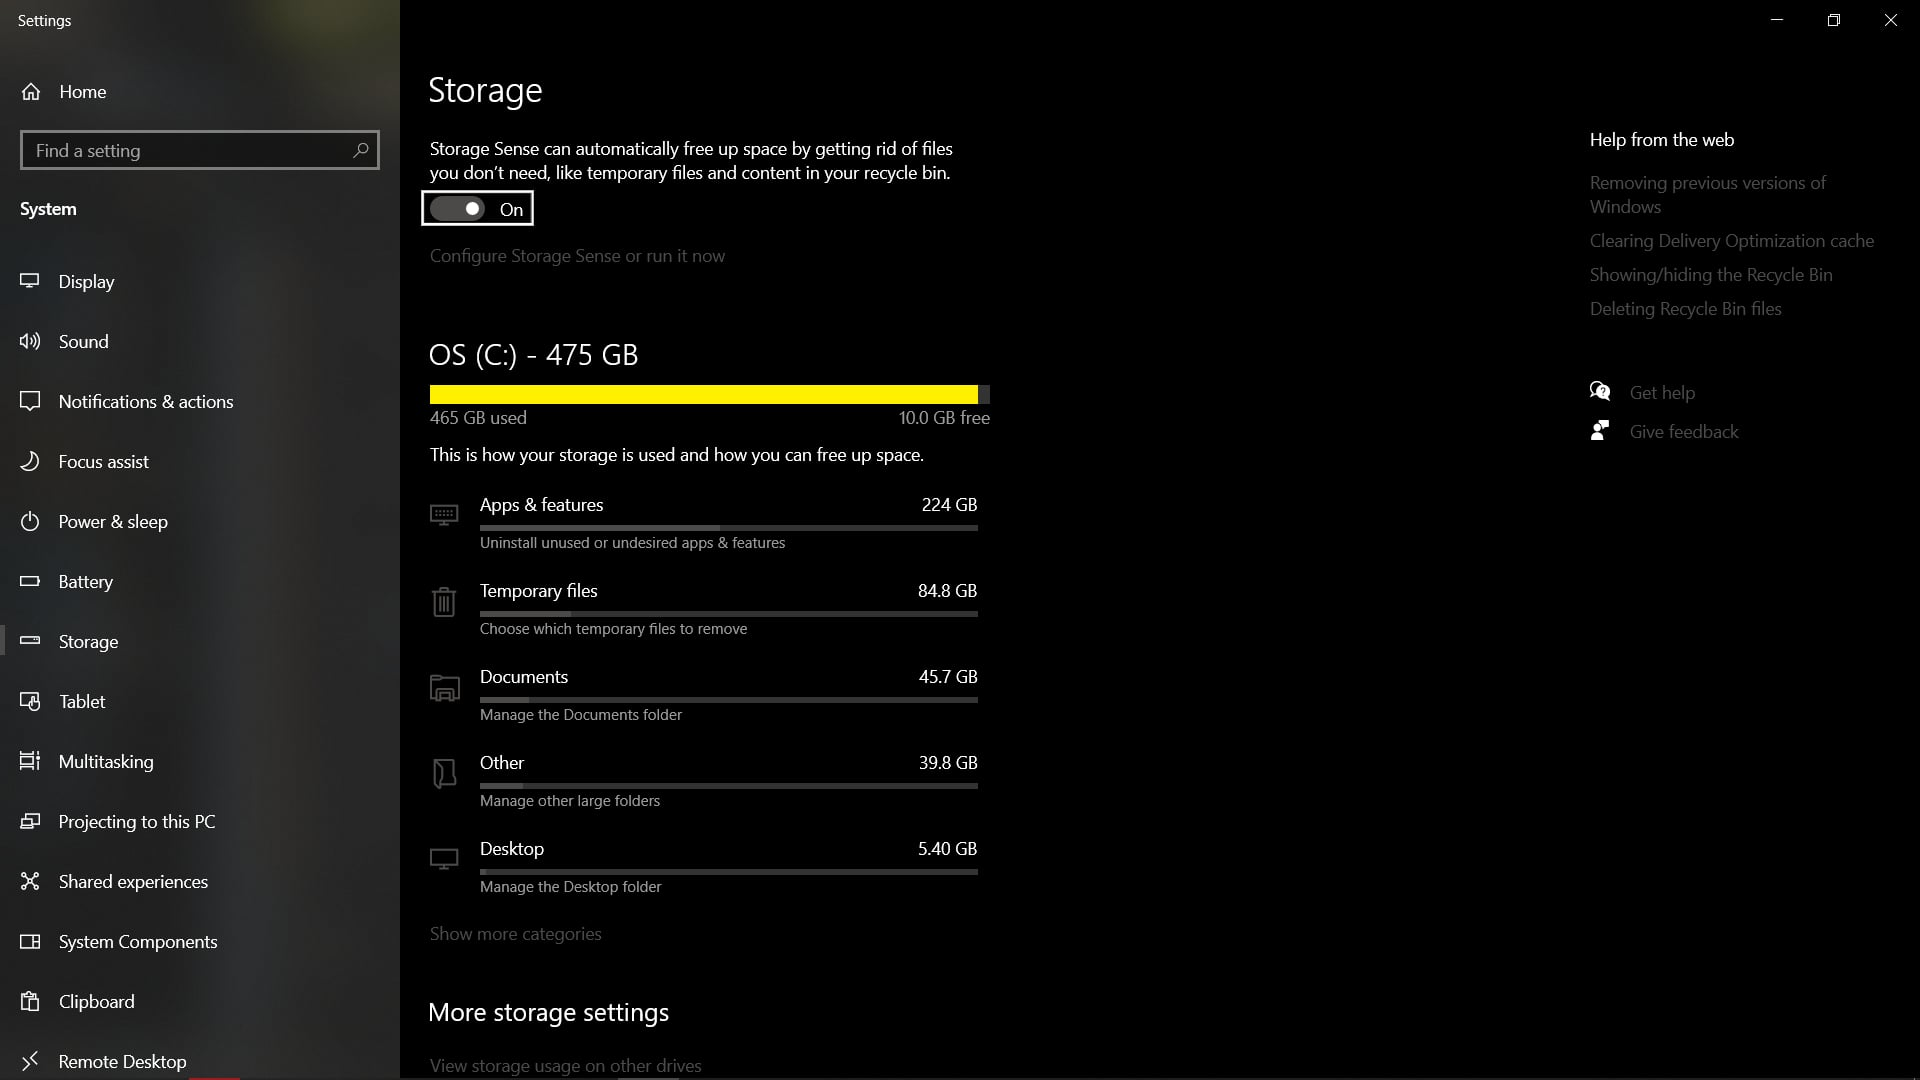

# **Supplementary Activity**

### **Dataset**

In [31]:
#Getting a new dataset
# Paste Roboflow code from snippet here from above to here!
from roboflow import Roboflow
rf = Roboflow(api_key="1V0Jhart5itO7feAZpBp")
project = rf.workspace("brad-dwyer").project("thermal-cheetah")
dataset = project.version(1).download("yolokeras")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Thermal-Cheetah-1 in yolokeras:: 100%|██████████| 139/139 [00:00<00:00, 1820.64it/s]


**Analysis:** This part of the supplementary activity, the dataset included images that shows the images of a thermal images of cheetah. This part of the activity aims to detect the various images of cheetah (if the code were able to detect the subject based from the shape since it is a thermal images) used for object detection. The data came from roboflow just like the dataset used above.

### **Training of Dataset**

In [ ]:
"""
Self-contained Python script to train YOLOv3 on your own dataset
"""

import tensorflow
import numpy as np
import keras.backend
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = '_annotations.txt'  # path to Roboflow data annotations
    log_dir = 'logs/000/'                 # where we're storing our logs
    classes_path = '_classes.txt'         # path to Roboflow class names
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    print("-------------------CLASS NAMES-------------------")
    print(class_names)
    print("-------------------CLASS NAMES-------------------")
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/yolo.h5') # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.2 # set the size of the validation set
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 32
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=500,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 32 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=100,
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    keras.backend.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    keras.backend.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

if __name__ == '__main__':
    _main()

In [32]:
#since the needed h5 files and weights are already saved, training the new dataset would be the next action to take
#trying the python file for training the data
!python train_cheetah.py

Create YOLOv3 model with 9 anchors and 2 classes.
Load weights model_data/yolo.h5.
Freeze the first 249 layers of total 252 layers.
Train on 81 samples, val on 9 samples, with batch size 32.
Epoch 1/40

2/2 [==============================] - 57s 29s/step - loss: 9095.2681 - val_loss: 7423.5283
Epoch 2/40

2/2 [==============================] - 42s 21s/step - loss: 7170.6521 - val_loss: 5513.0410
Epoch 3/40

2/2 [==============================] - 38s 19s/step - loss: 5607.9705 - val_loss: 4641.5063
Epoch 4/40

2/2 [==============================] - 38s 19s/step - loss: 4475.1223 - val_loss: 3454.0093
Epoch 5/40

2/2 [==============================] - 38s 19s/step - loss: 3533.7153 - val_loss: 2668.4905
Epoch 6/40

2/2 [==============================] - 38s 19s/step - loss: 2768.5254 - val_loss: 2162.7261
Epoch 7/40

2/2 [==============================] - 40s 20s/step - loss: 2290.2765 - val_loss: 1776.9082
Epoch 8/40

2/2 [==============================] - 39s 19s/step - loss: 1827.0009

Using TensorFlow backend.
2024-04-01 05:44:54.248904: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2024-04-01 05:44:54.249052: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.








2024-04-01 05:44:55.599767: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2024-04-01 05:44:55.602839: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library nvcuda.dll
2024-04-01 05:44:56.140872: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3050 Ti Laptop GPU major: 8 minor: 6 memoryClockRate(GHz): 1.485
pciBusID: 0000:01:00.0
2024-04-01 05:44:56.142441: W tensorflow/stream_executor/platform/default/dso_loader.cc:5

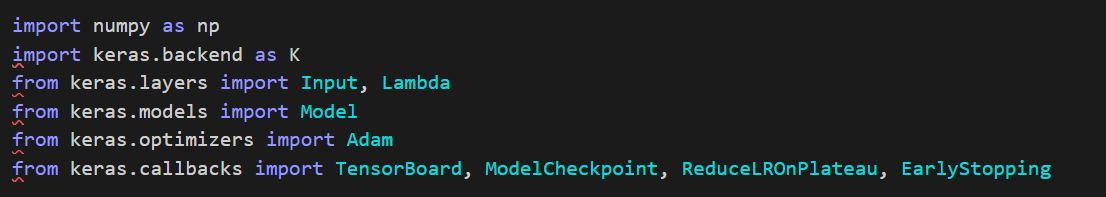

**Analysis:** This part of the supplementary activity would be the training part of the data. Using the train.py file, I was able to train the data and create the final weight file which is needed in order for the Image_detect.py file would run properly. Also the photo above shows the imported libraries in the training python file or the script above. It shows that Adam was also used as the optimizer and there are callbacks in order to regulate the training process of the data. This procedure is also the same from the previous one because this would create the weights needed in order for the object detection would be possible when the Image_detect python file would run.

### **Detecting Cheetah**

In [42]:
#Detecting Objects using Images
!python image_detect.py 

logs/111/trained_weights_final.h5 model, anchors, and classes loaded.


Using TensorFlow backend.
2024-04-01 06:52:40.189152: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2024-04-01 06:52:40.189294: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



2024-04-01 06:52:41.449533: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2024-04-01 06:52:41.452782: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library nvcuda.dll
2024-04-01 06:52:41.975635: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-01 06:52:41.978347: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-JNG07G70
2024-04-01 

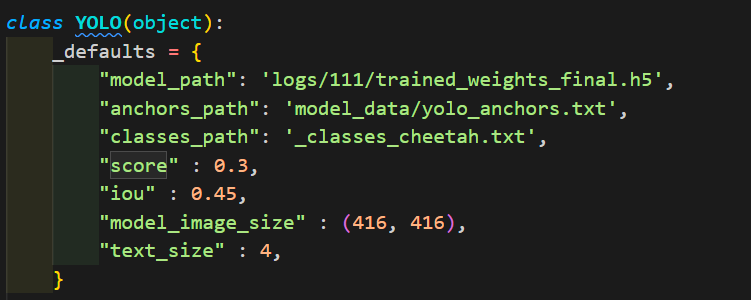

**Analysis:** This part of the supplementary activity is where the images are used for object detection. There would be an image that will be placed then the file or python file will detect the pieces using the weights of the model came from training the model used. Also, the photo above shows iou and threshold score for the bounding box or the measurement in detecting the object. In this case, the code used an iou score of 0.45 and a threshold score of 0.3, together with the other factors needed for the detection of chess pieces in which the results were displayed below. It is the same as the one used on the procedure part for the chess dataset.

### **Detecting Cheetah (Results)**

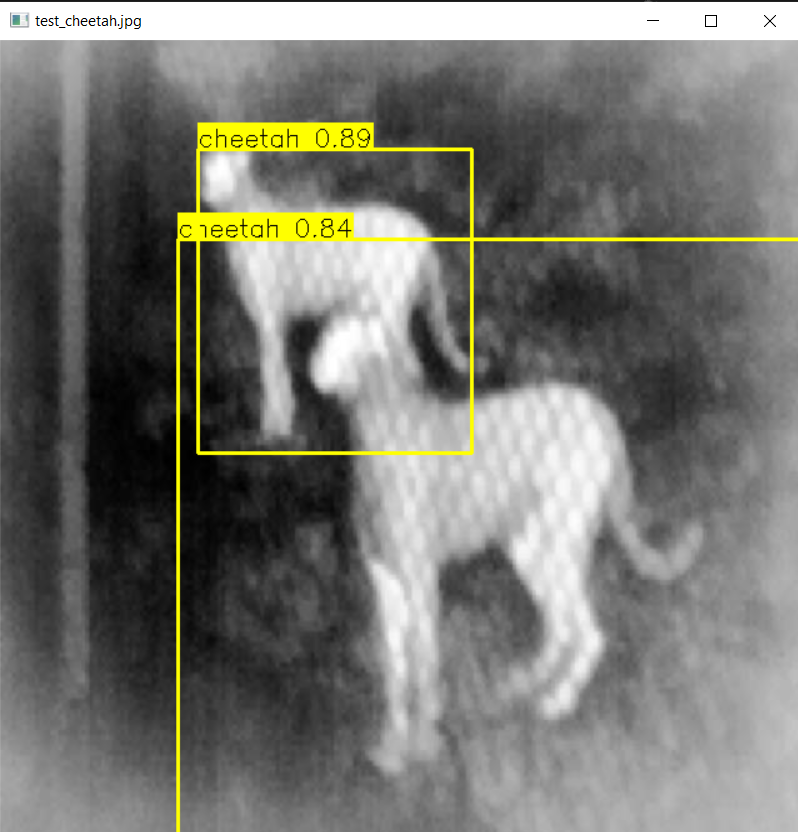

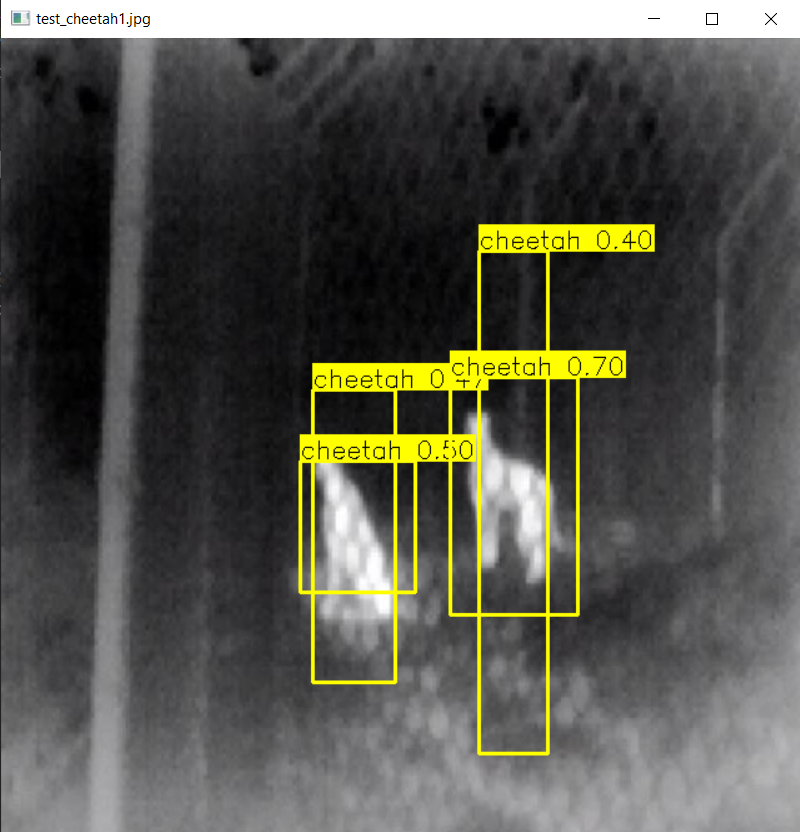

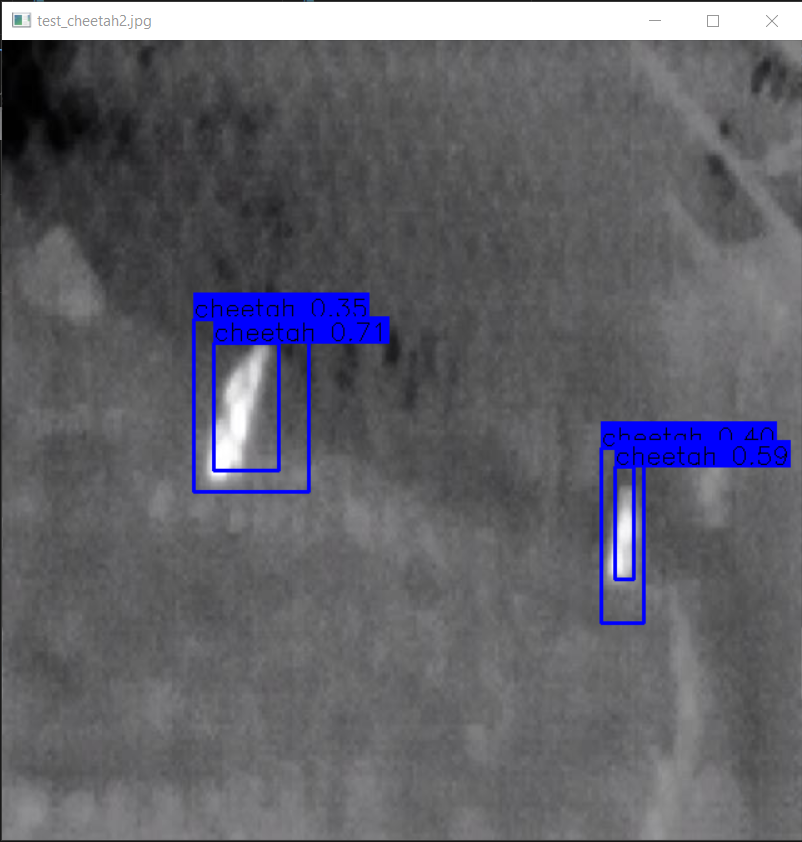

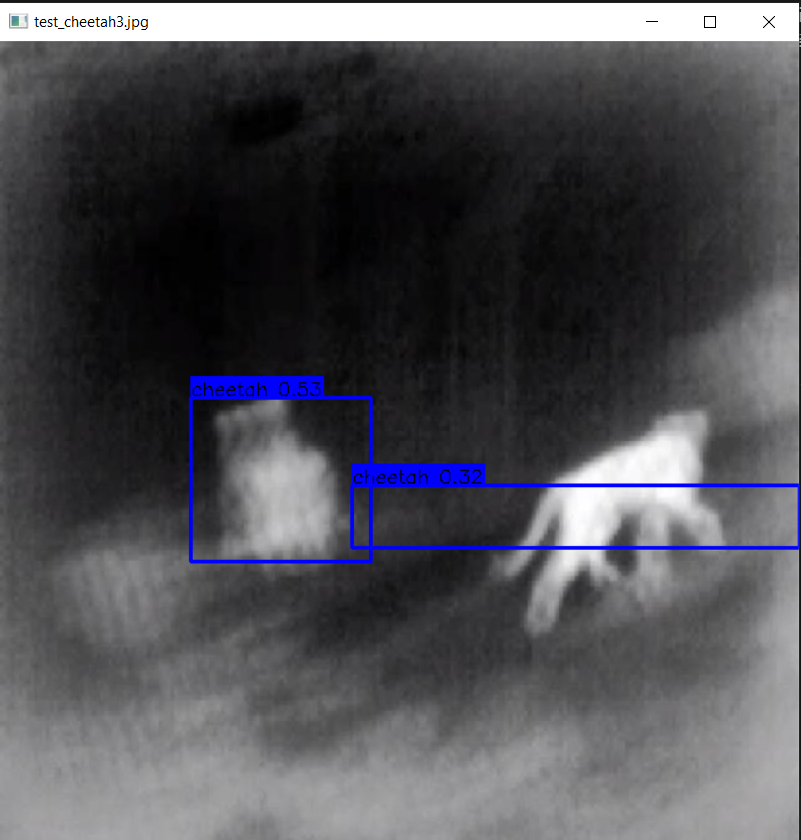

**Analysis/Evaluation:** The images above shows the various images in the test section of the dataset. Just like the results from the previous dataset, the results shows some evidences that the image_detect python file work properly (bounding boxes were present). The weights came from the training file work properly especially the confidence level score of the bounding boxes reaches approximately from 70% above depending on the placement and quality of the images that gives a factor in determining the objects shown in the image since there around 50% confidence level.

### ***Research on object detection evaluation metrics: How can you evaluate the performance of an object detection model?***
<br>**Answer:** Just like other methods in neural networks and machine learning, object detection models also have their own ways to evaluate its performance. Through using **Mean Average Precision (mAP)**, evaluating an object detection model is possible. It is a widely used metric for evaluating object detection for it calculates the average precision for each class across various IoU thresholds then compute the mean over all classes. In other words, it compares the ground-truth bounding box to the detected box and returns the score. The higher the score obtained, the more accurate the model when it comes to detecting the subjects of interest. As mentioned above, to calculate Mean Average Precision, IoU score or threshold is needed. **Intersection over Union or (IoU)** is a measure based on Jaccard Index that evaluates the overlap between two bounding boxes. It needs a ground truth bounding box and a predicted bounding box. Through this, we can tell if a detection made is valid (True Positive) or not (False Positive). In addition, Average Precision is also used to compare the performance of object detection. It is a way to summarize the precision-recall curve into a single value representing the average of all precisions. It is the weighted sum of precisions at each threshold where the weight is the increase in recall. Precision and Recall were mentioned above in which they are defined as measures the fraction of correctly detected objects among all predicted objects and measures the fraction of correctly detected objects among all ground truth objects, respectively.

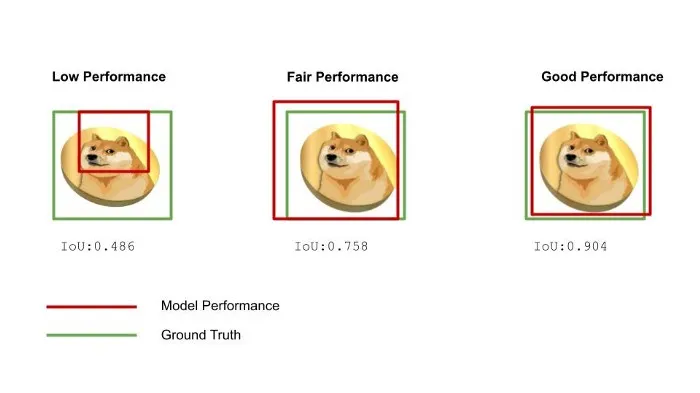
<br>*The photo above shows how an object detection is being evaluated using the metrics being discussed above.*

**References:**
* Data, L. Y. (2023, December 14). How to use object detection metrics for computer vision excellence? Label Your Data. https://labelyourdata.com/articles/object-detection-metrics
* P. Dollár, "Object Detection Metrics," GitHub, [Online]. Available: https://github.com/rafaelpadilla/Object-Detection-Metrics
* Gad, A. (n.d.). Evaluating object detection models using mean average precision - KDNuggets. KDnuggets. https://www.kdnuggets.com/2021/03/evaluating-object-detection-models-using-mean-average-precision.html
* Enlabeler. (2022, January 5). How to evaluate the performance of an object detection neural network using mAP. Medium. https://medium.com/@enlabeler/how-to-evaluate-the-performance-of-an-object-detection-neural-network-using-map-5b3eb0a5a81c

**Image Reference:**
* Enlabeler. (2022b, January 5). How to evaluate the performance of an object detection neural network using mAP. Medium. https://medium.com/@enlabeler/how-to-evaluate-the-performance-of-an-object-detection-neural-network-using-map-5b3eb0a5a81c

# **Conclusion:**

This activity is too draining to do since there are things needed to consider and follow in order for it to be finished. The problems or issues stated above hinders in achieving the completion of this activity for a short period of time. However, doing this activity would be able to give us a new knowledge in how YOLO algorithms work. In this case, we were tasked to used YOLOv3 which is one of the old YOLO algorithm made. Through keras and tensorflow, YOLOv3 was able to implement for the purpose of object detection. The creation of h5 files and weights were a needed tasks so that the code or code file for object detection would be able to run properly. The procedure above shows a good result based on the confidence levels that were displayed along the images used. However, the object detection of the supplementary activity shows a lower results compared to the object detection on the procedure part of this activity. this may be because of the number of images used in the training part of the dataset. The cheetah dataset has a small number of training images than the chess dataset which greatly affects the performance result of the object detection. Overall, this activity is a challenging one because of the various issues encountered while doing this activity. Also, the running time of the training part of the data in this activity takes too much of the time because of the large number of images needed to be trained. Despite of all the issues and challenges encountered, I still managed to properly execute and learn few things from this hands-on activity of object detection of YOLOv3 using Keras and Tensorflow.

#### ***"I affirm that I have not given or received any unauthorized help on this exam, and that this work is my own."***

**Google Colab Link:** https://colab.research.google.com/drive/1oX_A0Gtb4P4scqS4qhDZ_lcFQf7K8yIk?usp=sharing